In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [4]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

# 1. Model building

<font color='red'>Assignment:</font> Get **luxury** (**price** higher than 500k dollars) as targets for training and testing and assign them to variables **y_train** and **y_test**, respectively.

In [29]:
# y_train = train_raw['price'].map(lambda x: float(x.strip('$').replace(',','') if type(x)==str else x))
# y_test = test_raw['price'].map(lambda x: float(x.strip('$').replace(',','') if type(x)==str else x))

# y_train = y_train.map(lambda x: 1 if x > 500000 else 0)
# y_test = y_test.map(lambda x: 1 if x > 500000 else 0)

In [5]:
# Train and test data

features = list(df.columns)
target = ["price", "luxury"]
features = [fea for fea in features if fea not in target]

X_train = train_raw[features]
X_test = test_raw[features]

y_train = train_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)
y_test = test_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)

<font color='red'>Assignment:</font> Build a transformation class to extract, preprocess, and transform **cost**; wrap up this class with **MinMaxScaler** and **LogisticRegression** to build a classification pipeline.

In [6]:
class Cost_Transformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def cost2num(self, x):
        if type(x) == str: 
            x = x.strip('$').strip('k')
            return float(x)*1000
        else:
            return x

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [8]:
steps = [('ctf', Cost_Transformer()),
         ('rescale', MinMaxScaler()),
         ('logr', LogisticRegression())]
model = Pipeline(steps)
model = model.fit(train_raw, y_train)

#### <font color='red'>Note:</font> is rescale necessary here?

Not necessary if model performance is considered. But yes if feature importance will be compared. Also, it is necessary to rescale when regularization is needed.

<font color='red'>Question:</font> What is logistic regression? Is logistic regression a regression algorithm?

### Logistic Regression is used when the dependent variable(target) is categorical. 
### It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function. 
### Although logistic regression is widely used as a supervised classification algorithm, it by nature still is a regression algorithm. Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. The setting of the threshold value is a very important aspect of logistic regression and is dependent on the classification problem itself.

<font color='red'>Question:</font> Is logistic regression a linear algorithm? What is the relationship between logistic regression and linear regression?

###  Logistic regression is a linear method because the model is a linear combination of the inputs. Similar to the linear regression, logistic regression predicts a continuous outcome (i.e., the probability of an event). Different from the linear regression, the predictions in logistic regression are transformed using the logistic/sigmoid function such that we can use logistic regression to predict discrete values or categories like True/False.

### (1) Linear: $y = a_{0} + a_{1}x + ...$
### (2) Logistic: $p = \frac{e^{b_{0} + b_{1}x}}{1 + e^{b_{0} + b_{1}x}}$  => $log(\frac{p}{1-p}) = b_{0} + b_{1}x + ...$

<font color='red'>Question:</font> What is sigmoid function? What is it for?

### The sigmoid function, also called the logistic function, is a mathematical function that can take any real value and map it to between 0 to 1, but never exactly at those limits. The function takes on a form of: $\frac{1}{1 + e^{-x}}$. 

### The sigmoid function is used mostly used in classification type problem since we need to scale the data in some given specific range with a threshold.

# 2. Predicting

## 2.1 Prediction with default settings

<font color='red'>Assignment:</font> Use the **predict** function of the model to make predictions for the training set and test set, and assign the outputs to **y_train_pred** and **y_test_pred**, respectively.

In [9]:
y_train_pred = model.predict(train_raw)
y_test_pred = model.predict(test_raw)

<font color='red'>Question:</font> What are the shapes of **y_train_pred** and **y_test_pred**? What do the values in **y_train_pred** and **y_test_pred** mean?

In [10]:
print(y_train_pred.shape)
print(y_test_pred.shape)
print(y_train.shape)
print(y_test.shape)

(2757,)
(429,)
(2757,)
(429,)


In [11]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 1 means we predict that this is a luxury product (price > 500K), 0 means otherwise.

<font color='red'>Assignment:</font> Calculate the training and testing accuracy scores.

In [12]:
from sklearn.metrics import accuracy_score

print("Accuracy score for the training set: {0:.3f}".
      format(accuracy_score(y_train,y_train_pred)))
print("Accuracy score for the testing set: {0:.3f}".
      format(accuracy_score(y_test,y_test_pred)))

Accuracy score for the training set: 0.940
Accuracy score for the testing set: 0.907


<font color='red'>Assignment:</font> Calculate the precision, recall, and f1 scores. You can use classification report.

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2573
           1       0.70      0.17      0.27       184

    accuracy                           0.94      2757
   macro avg       0.82      0.58      0.62      2757
weighted avg       0.93      0.94      0.92      2757

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       383
           1       0.71      0.22      0.33        46

    accuracy                           0.91       429
   macro avg       0.81      0.60      0.64       429
weighted avg       0.89      0.91      0.88       429



<font color='red'>Assignment:</font> Get the confusion matrix.

TN FP <br>
FN TP

In [14]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[2560   13]
 [ 153   31]]
[[379   4]
 [ 36  10]]


In [15]:
predictions = pd.DataFrame(y_test_pred)
predictions[0].value_counts()

0    415
1     14
Name: 0, dtype: int64

<font color='red'>Question:</font> Is this model better than the all-positive and all-negative models?

**Answer:**

Based on wegithed average f1 score, this model (0.92 train, 0.89 test) performs better than the all-negative model (0.90 train, 0.84 test) and the all-positive model (0.01 train, 0.02 test).

We also observed that this model performs better when predicting negative samples (label 0) than predicting positive samples (label 1) based on all the metrics (precision, recall, and f1-score). I.e., prediction is biased to the majority class due to data imbalance.

## 2.2 Prediction with balanced class weights

<font color='red'>Assignment:</font> Set class_weight in Logistic Regression and retrain the model.

In [16]:
steps = [('ctf', Cost_Transformer()),
         ('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model = Pipeline(steps)
model = model.fit(train_raw, y_train)

In [17]:
y_train_pred = model.predict(train_raw)
y_test_pred = model.predict(test_raw)

<font color='red'>Assignment:</font> Re-calcualte all the above metrics and confusion matrix.

In [18]:
print("Accuracy score for the training set: {0:.3f}".
      format(accuracy_score(y_train,y_train_pred)))
print("Accuracy score for the testing set: {0:.3f}".
      format(accuracy_score(y_test,y_test_pred)))

Accuracy score for the training set: 0.858
Accuracy score for the testing set: 0.872


In [20]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2573
           1       0.28      0.71      0.40       184

    accuracy                           0.86      2757
   macro avg       0.63      0.79      0.66      2757
weighted avg       0.93      0.86      0.88      2757

              precision    recall  f1-score   support

           0       0.97      0.89      0.92       383
           1       0.44      0.76      0.56        46

    accuracy                           0.87       429
   macro avg       0.71      0.82      0.74       429
weighted avg       0.91      0.87      0.89       429



In [21]:
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[2236  337]
 [  54  130]]
[[339  44]
 [ 11  35]]


In [22]:
predictions = pd.DataFrame(y_test_pred)
predictions[0].value_counts()

0    350
1     79
Name: 0, dtype: int64

<font color='red'>Question:</font> Do you see any difference? Why is the difference?

### After we balance the data class distribution, the accuracy and precision (macro avg) decreased, which is to be expected. The recall increased because of the decreasing in FN (macro avg). The new confusion matrix also shows an increase in TP (and FP).


For how class_weight works: It penalizes mistakes in samples of class[i] with class_weight[i] instead of 1. So higher class-weight means you want to put more emphasis on a class. It basically means replicating the smaller class until you have as many samples as in the larger one, but in an implicit way. (Ref: https://stackoverflow.com/questions/30972029/how-does-the-class-weight-parameter-in-scikit-learn-work)

<font color='red'>Question:</font> Which results are more reasonable? Why?

### The balanced result is more reasonable. Standard classifier algorithms like Decision Tree and Logistic Regression have a bias against the classes that have small number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class. Therefore, we need to balance the data class distribution first before building any model.

<font color='red'>Question:</font> What are the other methods to deal with imbalanced data?

### (1) Random Up-sampling and down-sampling the training data
### (2) Cluster-based Up-sampling
### (3) Modifying existing classification algorithms to make them appropriate for imbalanced data sets. The approach involves constructing several two stage classifiers from the original data and then aggregate their predictions. (Bagging based and Boosting based)

## Additional Notes

### Assumptions 

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/

First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).

### Cost function

log loss, -(y*log(p) + (1-y) *log(1-p))

Why cannot the cost function used for linear regression be used for logistic? Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it will be a non-convex function of parameters. Gradient descent will converge into global minimum only if the function is convex.

### Deal with imbalanced data (extreme base rate)
- Data: resample the data, balance the majority and minority data size.
- Loss function: class_weight = balanced, penalize more for not correctly identifying minority class.
- Model: ensemble, bagging or boosting.
- Metrics: roc_auc score, precision, and recall score.


#### If you want to read more ...

Ref: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

5 Techniques to Handle Imbalanced Data:
1. Change the performance metric
    - Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
    - Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
    - Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
    - F1: Score: the weighted average of precision and recall.
2. Change the algorithm
    - While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets.
3. Resampling Techniques — Oversample minority class
4. Resampling techniques — Undersample majority class

Ref: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

Ref: https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

2.1 Data resampling

2.1.3  Cluster-Based Over Sampling

In this case, the K-means clustering algorithm is independently applied to minority and majority class instances. This is to identify clusters in the dataset. Subsequently, each cluster is oversampled such that all clusters of the same class have an equal number of instances and all classes have the same size.  

Advantages
- This clustering technique helps overcome the challenge between class imbalance. Where the number of examples representing positive class differs from the number of examples representing a negative class.
- Also, overcome challenges within class imbalance, where a class is composed of different sub clusters. And each sub cluster does not contain the same number of examples.

Disadvantages
- The main drawback of this algorithm, like most oversampling techniques is the possibility of over-fitting the training data.

2.1.4  Informed Over Sampling: Synthetic Minority Over-sampling Technique for imbalanced data

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

Advantages
- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information

Disadvantages
- While generating synthetic examples SMOTE does not take into consideration neighboring examples from other classes. This can result in increase in overlapping of classes and can introduce additional noise
- SMOTE is not very effective for high dimensional data

2.1.5  Modified synthetic minority oversampling technique (MSMOTE) for imbalanced data

It is a modified version of SMOTE. SMOTE does not consider the underlying distribution of the minority class and latent noises in the dataset. To improve the performance of SMOTE a modified method MSMOTE is used.

2.2 Algorithmic Ensemble Techniques

The main objective of ensemble methodology is to improve the performance of single classifiers. The approach involves constructing several two stage classifiers from the original data and then aggregate their predictions.

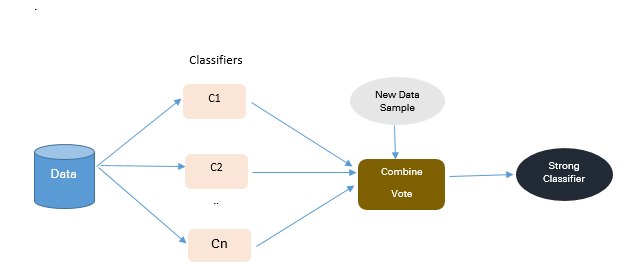

2.2.1. Bagging Based techniques for imbalanced data

Bagging is an abbreviation of Bootstrap Aggregating. The conventional bagging algorithm involves generating ‘n’ different bootstrap training samples with replacement. And training the algorithm on each bootstrapped algorithm separately and then aggregating the predictions at the end.

Bagging is used for reducing Overfitting in order to create strong learners for generating accurate predictions. Unlike boosting, bagging allows replacement in the bootstrapped sample.

Total Observations = 1000, Fraudulent   Observations =20, Non Fraudulent Observations = 980, Event Rate= 2 %. There are 10 bootstrapped samples chosen from the population with replacement. Each sample contains 200 observations. And each sample is different from the original dataset but resembles the dataset in distribution & variability.

The machine learning algorithms like logistic regression, neural networks, decision tree  are fitted to each bootstrapped sample of 200 observations. And the Classifiers c1, c2…c10 are aggregated to produce a compound classifier.  This ensemble methodology produces a stronger compound classifier since it combines the results of individual classifiers to come up with an improved one.

Advantages
- Improves stability & accuracy of machine learning algorithms
- Reduces variance
- Overcomes overfitting
- Improved misclassification rate of the bagged classifier
- In noisy data environments bagging outperforms boosting

Disadvantages
- Bagging works only if the base classifiers are not bad to begin with. Bagging bad classifiers can further degrade performance

2.2.2. Boosting-Based techniques for imbalanced data

Boosting is an ensemble technique to combine weak learners to create a strong learner that can make accurate predictions. Boosting starts out with a base classifier / weak classifier that is prepared on the training data. The base learners / Classifiers are weak learners i.e. the prediction accuracy is only slightly better than average. A classifier learning algorithm is said to be weak when small changes in data induce big changes in the classification model.

In the next iteration, the new classifier focuses on or places more weight to those cases which were incorrectly classified in the last round.

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

Types of Logistic Regression
1. Binary Logistic Regression: The categorical response has only two 2 possible outcomes. Example: Spam or Not
2. Multinomial Logistic Regression: Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)
3. Ordinal Logistic Regression: Three or more categories with ordering. Example: Movie rating from 1 to 5

Decision Boundary
- Decision boundary can be linear or non-linear. Polynomial order can be increased to get complex decision boundary.